In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.interpolate as spi

In [2]:
D = 3
N = 1e8
true_nlist = [1.5, 3, 6, 12, 24]
m = 2/3
nlist = [round(tnn/(1-m)-1, 4) for tnn in true_nlist]
s = 1.0
sclist = [1.0]
Llist = [0.5, 1.0, 2]
num_empty = 200
res_dir = 'nsc-boundary'
n_perms = 4

In [3]:
numC_np = np.zeros((len(Llist), len(sclist), len(nlist), n_perms))
for Lix, L in enumerate(Llist):
    for scix, sc in enumerate(sclist):
        c = s / sc
        for nix, n in enumerate(nlist):
            for randix in range(0, n_perms):
                true_n = true_nlist[nix]
                fout = (
                    f"nsc-boundary/D={D}_n={float(n)}_N={N:.2e}_"
                    f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
                )
                res = pd.read_csv(fout+'.csv')
                numC_np[Lix, scix, nix, randix]  = res.shape[0]

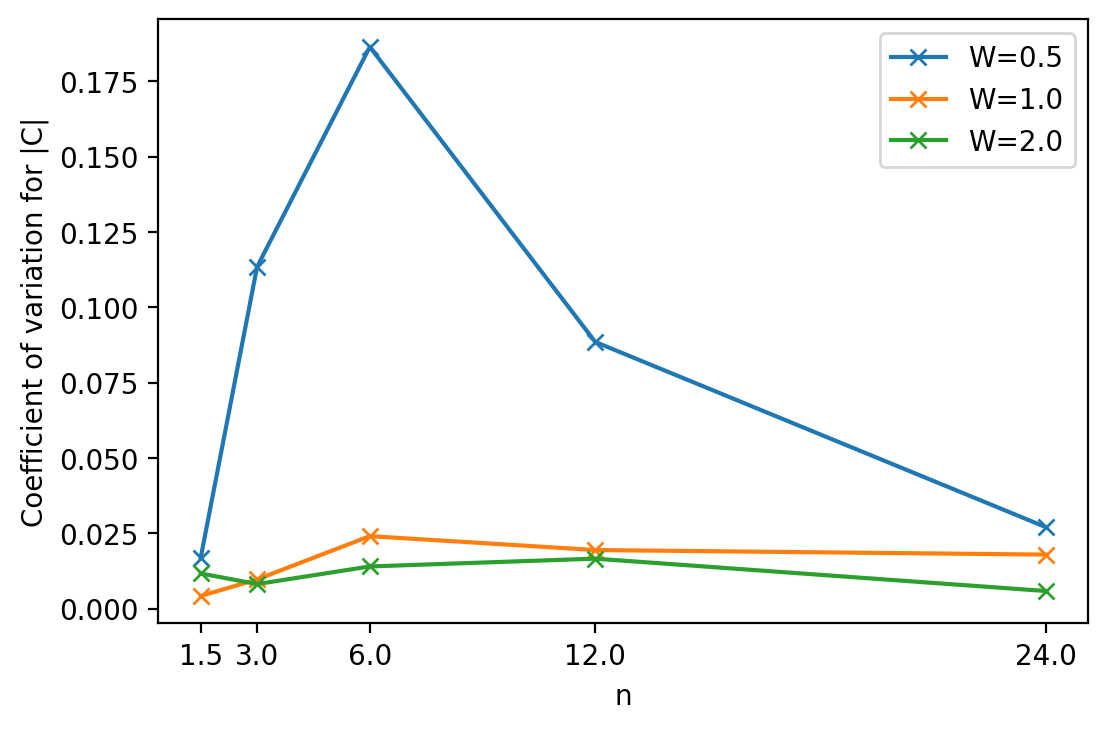

In [8]:
CoVs_np = np.std(numC_np, axis=3) / np.mean(numC_np, axis=3)
leg = []
fig = plt.figure(figsize=(6,4), dpi=200);
for Lix, L in enumerate(Llist):
    for scix, sc in enumerate(sclist):
        c = s / sc
        plt.plot(true_nlist, CoVs_np[Lix, scix,:],'x-');
        leg.append(f'W={L:.1f}');
plt.xlabel('n');
plt.ylabel('Coefficient of variation for |C|');
plt.gca().set_xticks(true_nlist);
plt.legend(leg);
fig.savefig('figures-friday/plotS2.png');

In [5]:
CoVs_np

array([[[0.01695374, 0.1134014 , 0.1863827 , 0.08851749, 0.02704502]],

       [[0.00424771, 0.00973163, 0.02410597, 0.01949011, 0.01798002]],

       [[0.01171994, 0.0082021 , 0.01404326, 0.01663454, 0.00589148]]])

In [6]:
numC_np

array([[[[  1638.,   1638.,   1631.,   1700.],
         [   345.,    345.,    416.,    305.],
         [   274.,    274.,    369.,    222.],
         [   653.,    653.,    750.,    586.],
         [  2809.,   2809.,   2998.,   2854.]]],


       [[[  5831.,   5831.,   5834.,   5775.],
         [  1707.,   1707.,   1748.,   1722.],
         [  1709.,   1709.,   1804.,   1705.],
         [  4623.,   4623.,   4815.,   4581.],
         [ 22264.,  22264.,  22943.,  21820.]]],


       [[[ 20185.,  20185.,  20689.,  20078.],
         [  8430.,   8430.,   8550.,   8357.],
         [ 10745.,  10745.,  11084.,  10713.],
         [ 32614.,  32614.,  33655.,  32173.],
         [164924., 164924., 167272., 165287.]]]])

In [7]:
CoVs_np

array([[[0.01695374, 0.1134014 , 0.1863827 , 0.08851749, 0.02704502]],

       [[0.00424771, 0.00973163, 0.02410597, 0.01949011, 0.01798002]],

       [[0.01171994, 0.0082021 , 0.01404326, 0.01663454, 0.00589148]]])